# **PARTE PRÁCTICA TERCER PARCIAL**

Tópicos en estadística \\

Ana Sofia Bossa Jaimes - 2220645 \\


# 1. Introducción
Este estudio se basa en la información recopilada en la Encuesta longitudinal de Protección Social - ELPS, llevada a cabo por el Departamento Administrativo Nacional de Estadística (DANE) en 2012, la cual mide las dinámicas y los cambios que tiene un hogar a lo largo del tiempo en relación con el sistema de protección social, y sus factores asociados como el mercado laboral, la educación, entre otros. El objetivo de la encuesta es diseñar, implementar y evaluar reformas orientadas a la mejoría del sistema de protección social en el país.
 En particular, se usó la base de datos D_MENORES, seguridad social en salud y educacion, en la cual se recopila información básica sobre los menores de 5 años en Colombia: el cuidado de sus acudientes, su estancia en la mayor parte del tiempo, su alimentación, su asistencia a jardín, etc.

 El objetivo del presente análisis es determinar bajo qué condiciones o escenarios, un niño de 5 años no es llevado a citas de control de crecimiento y desarrollo, es decir, bajo qué condiciones (familiares, de alimentación, de convivencia, etc.) un menor no recibe asistencia médica.

#2. Metodología
En el análisis realizado se consideraron las siguientes variables de la base de datos D_MENORES:


*   *P_51:* ¿dónde o con quién permanece ___ durante la mayor parte del tiempo entre semana?

1. Asiste a un hogar comunitario, guardería o jardín  
2. Con su padre o madre en la casa  
3. Con su padre o madre en el trabajo  
4. Con la empleada o niñera en la casa  
5. Al cuidado de un pariente de 18 años o más  
6. Al cuidado de un pariente menor de 18 años  
7. En casa solo  
8. Otro, ¿cuál?


*   *P_52:* ¿cuál es la razón principal por la que ____ no asiste a una guardería, hogar comunitario o jardín?
1 No hay una institución cercana
2 Es muy costoso
3 No encontró cupo
4 Prefiere el cuidado de un familiar en casa
5 Considera que no está en edad de asistir o es recien nacido
6 Otra, ¿cuál?

*  *P_55:* ¿recibe o toma desayuno en el lugar donde permanece la mayor parte del tiempo entre semana? Sí(1)/No(2)

*   *P_56:* ¿recibe o toma onces en el lugar donde permanece la mayor parte del tiempo entre semana? Sí(1)/No(2)

*  *P_57:* ¿recibe o toma almuerzo en el lugar donde permanece la mayor parte del tiempo entre semana? Sí(1)/No(2)

*  *P_6159s8:* la madre no realiza ninguna actividad habitualmente con el menor
*  *P_6163s8:* el padre no realiza ninguna actividad habitualmente con el menor
*  *P_6161:* ¿llevan a ___ a control de crecimiento y desarollo? Sí(1)/No(2)
*  *P_6161s1:* ¿cuántas veces lo llevaron durante los últimos 12 meses? 1-12

Inicialmente, se estudió el comportamiento de la variable P_6161 tomando como variables explicativas a P_51, P_52, P_55, P_56, P_57, P_6159s8 y P_6163s8  y posteriormente se tomó como variable de salida a P_6161.










In [ ]:
import pandas as pd
import io


In [ ]:
from google.colab import files
uploaded =files.upload()

Saving D. MENORES.txt to D. MENORES (1).txt


In [ ]:
datos_menores =pd.read_csv(io.BytesIO(uploaded['D. MENORES (1).txt']), delimiter='\t')
datos_menores.head(4)

,Directorio,Nro_encuesta,Secuencia_encuesta,Secuencia_p,Orden,P51,P52,P52s1,P53,P54,...,P8582s3,P8582s4,P8582s11,P8582s6,P8582s7,P8582s9,P8582s12,P8582s10,P8582s10a1,Fex_c
0,447,247,4,1,4,4,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1454.129389
1,17255,247,3,1,3,1,NaN,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.046128
2,373,247,5,1,5,1,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.021859
3,373,247,4,1,4,1,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.021859


##2.1. Eliminación de valores faltantes
En el proceso de limpieza de los datos, se eliminaron los valores faltantes únicamente de la variable *P_52*, ya que esta contenía valores nulos que podían interferir con el análisis. En el caso de las variables categóricas *P_51, P_55, P_56,  P_57*, no fue necesario aplicar ninguna eliminación, dado que no presentaban valores faltantes. Por otro lado, en el caso de la variable numérica *P_6161s1*, no se eliminaron sus existentes valores nulos, ya que estos están directamente relacionados con la variable a analizar *P_6161*. Si para un encuestado el valor de la variable *P_6161* es 1, es decir, el menor sí es llevado a control, la variable *P_6161s1* para ese encuestado es no nulo, ya que responde a cuántas veces se ha llevado el menor a control; si, por otro lado, la respuesta a la primera pregunta era negativa, la variable *P_6161s1* presenta un valor nulo para el encuestado, ya que no se realizó esta pregunta al conocer que el menor no es llevado a control. \\

De forma similar, los valores nulos presentes en las variables *P_6159s8* y *P_6163s8* representan que la madre y el padre del menor sí realizan alguna actividad con él. Esto se debe a que se realiza previamente la pregunta tipo filtro: '¿cuáles actividades realiza la/el madre/padre habitualmente con___?' y se procede a averiguar cuáles actividades son realizadas, luego, si el padre o la madre sí realiza alguna actividad con el menor, esto no queda registrado en el valor de esta variable.




In [ ]:
datos_menores.P52.isnull().value_counts()
datos_menores.P6161s1.isnull().value_counts()
datos_menores.P6159s8.isnull().value_counts()
datos_menores.P6163s8.isnull().value_counts()

,count
P6163s8,
True,3033
False,1058


In [ ]:
tabla = datos_menores.loc[datos_menores.P52.notnull(), ["P51","P52", "P55", "P56", "P57", "P6159s8",
"P6163s8", "P6161", "P6161s1"]]
tabla.head(4)



,P51,P52,P55,P56,P57,P6159s8,P6163s8,P6161,P6161s1
0,4,5.0,1,1,1,NaN,NaN,1,6.0
4,2,5.0,1,1,1,NaN,NaN,1,3.0
5,2,5.0,1,1,1,1.0,1.0,1,1.0
6,2,5.0,1,1,1,NaN,NaN,1,4.0


In [ ]:
tabla.P6159s8.isnull() #MADRES QUE SI HACEN ALGUNA ACTIVIDAD CON LOS MENORES
tabla.loc[tabla.P6159s8.isnull(), "P6159s8"] = 2  #Asignar 2 a las madres que si hacen actividad
tabla.P6163s8.isnull()  #PADRES QUE SI HACEN ALGUNA ACTIVIDAD CON LOS MENORES
tabla.loc[tabla.P6163s8.isnull(), "P6163s8"] = 2  #Asignar 2 a los padres que si hacen actividad

In [ ]:
tabla.P6163s8.value_counts()   #Tenemos más de 2000 datos, luego tomamos datos de entrenamiento y de validacion

,count
P6163s8,
2.0,2024
1.0,700


In [ ]:
#Conversion a variables tipo dummi de las variables categóricas (sin incluir la variable respuesta)
dummi_menores = pd.get_dummies(tabla, columns=["P51", "P52", "P55", "P56", "P57", "P6159s8", "P6163s8"], dtype = float)
dummi_menores.head(5)


,P6161,P6161s1,P51_2,P51_3,P51_4,P51_5,P51_6,P51_7,P51_8,P52_1.0,...,P55_1,P55_2,P56_1,P56_2,P57_1,P57_2,P6159s8_1.0,P6159s8_2.0,P6163s8_1.0,P6163s8_2.0
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
dummi_menores.rename(columns = {'P51_2':'acu casa', 'P51_3':'acu trab', 'P51_4':'niñera', 'P51_5':"mayor", 'P51_6':"menor", 'P51_7':"solo", 'P51_8':"otra persona"}, inplace = True)
dummi_menores.rename(columns = {'P52_1.0':"lejos", 'P52_2.0':"costoso", 'P52_3.0':"sin cupo", 'P52_4.0':"casa", 'P52_5.0':"edad", 'P52_6.0':"otro motivo"}, inplace = True)
dummi_menores.rename(columns = {'P55_1':"si desa", 'P55_2':"no desa", 'P56_1':"si alm", 'P56_2':"no alm", 'P57_1':"si onces", 'P57_2':"no onces"}, inplace = True)
dummi_menores.rename(columns = {'P6159s8_1.0':"no comp madre", 'P6159s8_2.0':"si comp madre", 'P6163s8_1.0':"no comp padre", 'P6163s8_2.0':"si comp padre"}, inplace = True)
dummi_menores.head(5)
#Cambio de los nombres de las columnas de dummi menores sin reasignarlos

,P6161,P6161s1,acu casa,acu trab,niñera,mayor,menor,solo,otra persona,lejos,...,si desa,no desa,si alm,no alm,si onces,no onces,no comp madre,si comp madre,no comp padre,si comp padre
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
x = dummi_menores.drop(["P6161", 'P6161s1'], axis = 1)  #VARIABLES EXPLICATIVAS
y = dummi_menores["P6161"].astype(str)    #VARIABLE DE SALIDA P6161
y.loc[(y == "1")] = "Si"
y.loc[(y == "2")] = "No"
y.value_counts()

,count
P6161,
Si,2210
No,514



Dado que se tienen más de 2000 datos, tomamos datos de entrenamiento del 80% y datos de validación del 20%. Usamos la clase train_test_split del paquete sklearn y el módulo model_selection. Esta usa el metodo de validacion cruzada o el muestreo estratificado para la selección de los datos de entrenamiento y de validación.


In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

## 2.2. Modelos implementados para la red neuronal




**MLPClassifier:** clasificador de perceptrón multicapa. Tomado del paquete sklearn y del módulo neural_network.

> "La clase  MLPClassifier implementa un algoritmo de perceptrón multicapa (MLP) que entrena usando Retropropagación [...] puede ajustar un modelo no lineal a los datos de entrenamiento" (Scikit-learn developers, s.f.). \\
>"Este modelo optimiza la función log-loss usando LBFGS o estocástico descenso de gradiente" (Scikit-learn developers, s.f.).

Los hiperparámetros usados en esta clase fueron:
* **hidden_layer_sizes**: se escogió un número de capas ocultas igual a 7, cada una con 50 neuronas
* **max_iter**: define el número máximo de iteraciones (o épocas) que se permiten durante el entrenamiento del modelo. En solucionadores estocásticos como sgd o adam, max_iter indica el número de épocas, es decir, cuántas veces se reutiliza cada punto de datos, y no la cantidad de pasos individuales de gradiente.  Se establece 1000 como el número máximo de iteraciones
* **activation**: es la función de activación para las capas ocultas. Las distintas opciones son 'identity'(corresponde a $f(x)=x$), 'logistic' ($f(x) =1 / (1 + exp(-x))$), 'tanh' ($f(x)=tanh(x)$) y 'relu' ($f(x) = max(0, x)$).

* **solver**: define el algoritmo usado por la red para ajustar los pesos internos durante el entrenamiento. Los argumentos posibles son: 'adam' (optimizador basado en gradientes estocásticos), 'sgd' (descenso de gradiente estocástico clásico) y 'lbfgs' (optimizador determinista basado en métodos cuasi-Newton)

Se escogieron conjuntamente los parámetros 'tanh' y 'lbfgs', debido a que bajo estos se da el mayor número de predicciones correctas  (12) para la clase 0, que corresponde a los menores que no son llevados a control, los cuales son el interés del presente análisis.






In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 50),
                        max_iter = 1000, activation = 'tanh',
                        solver = 'lbfgs') # Curva de pérdida adam o sgd
#Llamando el modelo a implementar
mlp_clf.fit(trainX, trainY)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh',
              hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 50), max_iter=1000,
              solver='lbfgs')

Para ejemplificar por qué la elección previamente realizada de los hiperparámetros bajo el modelo MLPClassifier garantizaba una mejor representación de los valores de interés (menores que no reciben asistencia) a comparación de la elección de otros argumentos, se graficó la curva de pérdida que presenta el modelo al tomar como función de activación 'logistic' y solver como 'sgd' y se observó que efectivamente este modelo no es adecuado, ya que la función de pérdida no converge a un valor lo suficientemente cercano a 0 y decae muy rápidamente en las primeras 5 iteraciones

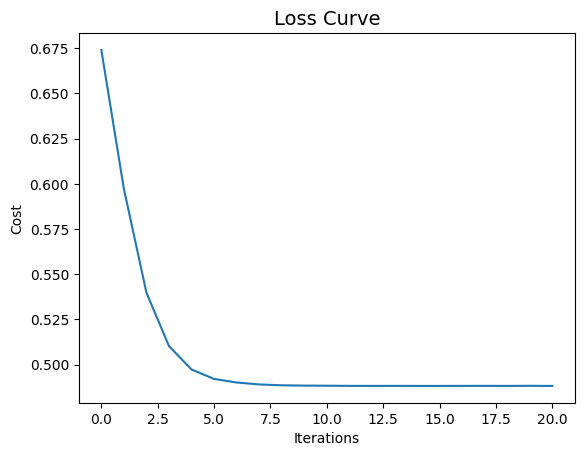

In [ ]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 50),
                        max_iter = 200, activation = 'logistic',
                        solver = 'sgd') # Curva de pérdida adam o sgd
#Llamando el modelo a implementar
mlp_clf1.fit(trainX,trainY)
y_pred1 = mlp_clf1.predict(testX)
plt.plot(mlp_clf1.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = mlp_clf.predict(testX) # Predicción sobre los datos de validación
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred, testY))) # Comparar la predicción con los datos de validación

Accuracy: 0.82


Se observa que este modelo tiene una exactitud del 82%, es decir, presenta un ajuste adecuado y modela adecuadamente los datos reales (de validación). Pese a esto, sólo presenta 10 predicciones correctas para la clase de interés, luego, no tomamos este modelo para nuestro análisis.

Text(0.5, 1.0, 'Confusion Matrix')

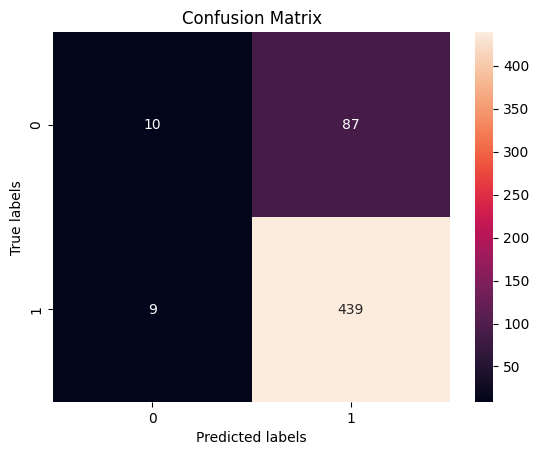

In [ ]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)
cm
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')


Se observa que el modelo predijo correctamente a 10 menores que no recibieron asistencia médica y a 439 que sí lo hicieron. Por otro lado, se predijo incorrectamente que 9 menores no recibieron asitencia médica cuando sí lo hicieron y que 87 sí la recibieron cuando no fue así.

**RandomForestClassifier:**  Tomado del paquete sklearn y del módulo ensemble.

> "Un bosque aleatorio (Random Forest) es un meta-estimador que ajusta múltiples clasificadores de árboles de decisión sobre submuestras distintas del conjunto de datos, y luego utiliza el promedio para mejorar la precisión de las predicciones y controlar el sobreajuste" (Scikit-learn developers, s.f.). \\

Los hiperparámetros usados en esta clase fueron:
* **n_estimators**: corresponde al número de árboles en el bosque. Se mantuvo el valor por defecto (100)
* **random_state**: controla el componente aleatorio del modelo, tanto en la selección de observaciones (filas) como en la selección de variables (columnas) durante el entrenamiento.
Garantiza la reproducibilidad de los resultados, ya que al fijar un valor, se asegura que el modelo siempre entrene de la misma forma al trabajar con los mismos datos. Este parámetro se estableció igual a 42.

Se observó que al modificar los valores de ambos parámetros, el número de predicciones correctas para la clase 0 se mantuvo igual (10 predicciones). Luego, se seleccionaron estos dos valores sin inconveniente.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(trainX, trainY)
y_pred_random = random_forest.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_random, testY)))


Accuracy: 0.83


A pesar de que la exactitud del modelo muestra que este tiene un ajuste adecuado, sólo se predijo correctamente 10 que menores no recibieron atención médica. Luego, este modelo aún no es apropiado para el análisis

Text(0.5, 1.0, 'Confusion Matrix')

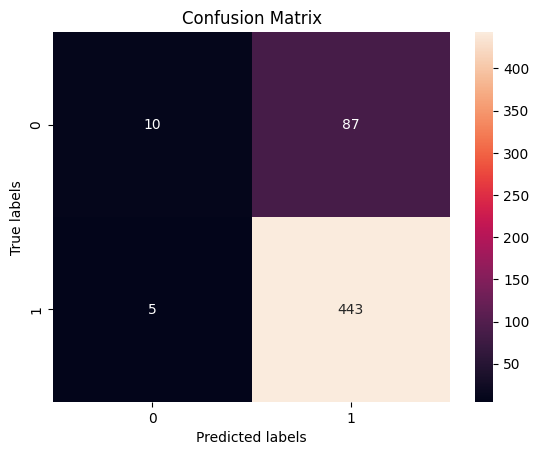

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm1 = confusion_matrix(testY, y_pred_random)
cm1
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

Se observa que el modelo predijo correctamente a 10 menores que no recibieron asistencia médica y a 443 que sí lo hicieron. Por otro lado, se predijo incorrectamente que 5 menores no recibieron asitencia médica cuando sí lo hicieron y que 87 sí la recibieron cuando no fue así.

**GaussianNB**:  Tomado del paquete sklearn y del módulo naive_bayes.
Es un algoritmo de aprendizaje supervisado basado en el Teorema de Bayes, el cual calcula la probabilidad de que un encuestado pertenezca a una clase determinada dado un conjunto de características.
Este modelo hace una suposición fuerte de independencia entre las variables explicativas, lo cual simplifica el proceso de cálculo. \\
Los argumentos de esta clase son:

*   **priors**: indica las probabilidades a priori de cada uno de los datos. Si no se establece, el modelo calcula estas probabilidades automáticamente
*   **var_smoothing**: es la proporción de la mayor varianza entre todas las características que se añade a las varianzas para mejorar la estabilidad del cálculo. El valor por defecto es $1e-09$ para evitar inconvenientes debidos a varianzas muy cercanas a 0.

Estos parámetros no se modificaron en la implementación del modelo, ya que no se conocen las probabilidades a priori de cada clase y además, se observó que al modificar el parámetro para suavizar la varianza el número de predicciones correctas para la clase 0 (31 predicciones) solo disminuía y no aumentaba a comparación de dejar el valor por defecto.  





In [ ]:
from sklearn.naive_bayes import GaussianNB   #Algoritmo de clasificacion gaussiano
clase_bayes = GaussianNB()
clase_bayes.fit(trainX, trainY)
y_pred_bayes = clase_bayes.predict(testX)
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_bayes, testY)))

Accuracy: 0.75


Puede observarse que el modelo presenta underfitting; sin embargo, es el que presenta el mayor número de coincidencias entre los valores esperados por el modelo y los datos reales, luego, este modelo es el adecuado para analizar las causas del porqué un menor no recibe asistencia médica.

Text(0.5, 1.0, 'Confusion Matrix')

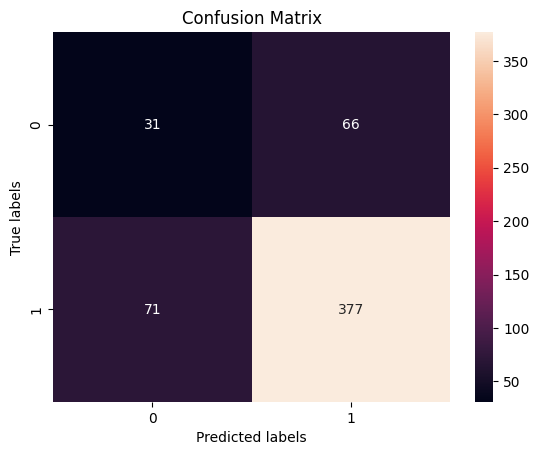

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm3 = confusion_matrix(testY, y_pred_bayes)
cm3
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm3, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

Se observa que el modelo predice correctamente a 31 menores que no asisten a control y 377 que sí lo hacen. Por otro lado, predice incorrectamente 71 menores que no reciben asistencia médica cuando sí lo hacen y 66 que sí la reciben cuando no es así.

**SVC**: Tomado del paquete sklearn y del módulo svm.

Este modelo implementa la técnica de máquinas de vectores de soporte basada en el paquete libsvm, la cual busca separar las clases mediante hiperplanos que maximizan el margen entre ellas.
Los hiperparámetros usados son:
*   **decision_function_shape**: define la forma de la matriz devuelta por la función de decisión del modelo SVC. Los posibles argumentos son 'ovo' (uno contra uno, es decir, cada clase vs ella misma) y 'ovr' (uno contra el resto, es decir, cada clase vs todo el resto). Se usó la forma 'ovr'
*   **kernel**: especifica el tipo de Kernel a usar en el algoritmo. Los distintos argumentos son 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. Se usó una función de kernel polinomial ('poly')
* **degree**: define el grado de la función polinomial del kernel. Sólo influye si se usa el argumento 'poly' anteriormente mencionado. El grado establecido fue 5.

Se establecieron estos valores para los hiperparámetros ya que se observaron 11 predicciones correctas en la clase 0 al usar una función polinomial de grado 5, mas al aumentar o disminuir este grado y al modificar otro de los argumentos, este número se mantenía o decrecía.

In [ ]:
from sklearn.svm import SVC
soporte_vect = SVC(decision_function_shape='ovr', kernel = "poly", degree = 5)
soporte_vect.fit(trainX, trainY)
y_pred_sopor = soporte_vect.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_sopor, testY)))

Accuracy: 0.83


El modelo presenta un ajuste adecuado de los datos, sin embargo, sólo 11 datos reales de la clase 0 coinciden con los valores esperados por el ajuste del modelo. Luego, puede establecerse que este modelo no es adecuado para el análisis de la clase de interés.

Text(0.5, 1.0, 'Confusion Matrix')

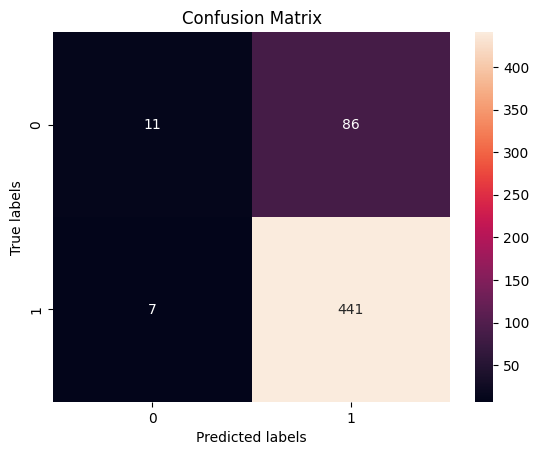

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_sopor)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

Se observa que el modelo predice correctamente a 11 menores que no asisten a control y 441 que sí lo hacen. Por otro lado, predice incorrectamente que 7 menores no reciben asistencia médica cuando sí lo hacen y que 86 sí la reciben cuando no lo hacen.

# 3. Resultados y análisis

Text(0.5, 1.0, 'Confusion Matrix')

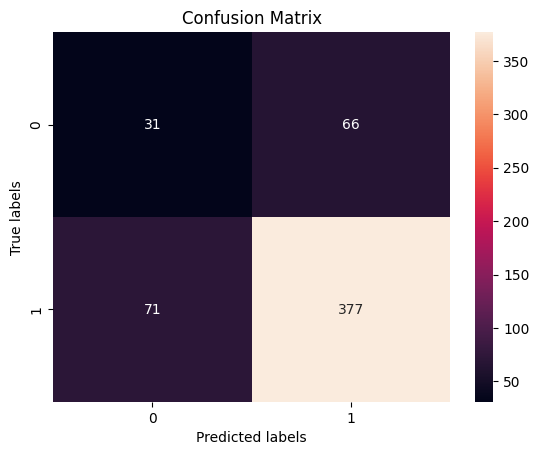

In [ ]:
ax= plt.subplot()
sns.heatmap(cm3, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

Puede observarse que el modelo presenta un muy buen desempeño para identificar a los menores que sí reciben control de crecimiento y desarrollo. Por otro lado, presenta debilidades para identificar a los menores que no lo reciben, ya que el número de predicciones correctas no es alto para la clase 0.

Desde un enfoque social, esto sugiere que la inaccesibilidad al control médico infantil podría estar condicionado por factores que no están suficientemente capturados por las variables del modelo, como condiciones de pobreza extrema, aislamiento geográfico o dinámicas familiares no convencionales ni previsibles, a diferencia de los patrones existentes en los hogares de menores que sí tienen acceso a controles. Este resultado destaca la necesidad de políticas públicas más enfocadas al contexto, así como la recolección de datos más cualitativos para complementar los modelos predictivos.

In [ ]:
trainX.columns

Index(['acu casa', 'acu trab', 'niñera', 'mayor', 'menor', 'solo',
       'otra persona', 'lejos', 'costoso', 'sin cupo', 'casa', 'edad',
       'otro motivo', 'si desa', 'no desa', 'si alm', 'no alm', 'si onces',
       'no onces', 'no comp madre', 'si comp madre', 'no comp padre',
       'si comp padre'],
      dtype='object')

In [ ]:
import numpy as np
no_obs = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]])
clase_bayes.predict(no_obs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U2')

Puede observarse que un menor que permanece la mayor parte del tiempo entre semana solo en su casa, que no asiste al jardín dado que este no tiene cupos, que no desayuna ni almuerza, que no realiza actividades con su madre pero sí con su padre no recibe atención médica.


In [ ]:
no_obs = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]])
clase_bayes.predict(no_obs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Si'], dtype='<U2')

Se observa que un menor que permanece la mayor parte del tiempo entre semana en su casa con una niñera, que no asiste al jardín dado que no tiene la edad suficiente para hacerlo, que sí desayuna mas no almuerza ni toma onces y que comparte con ambos padres sí es llevado a consulta de control.

In [ ]:
no_obs = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]])
clase_bayes.predict(no_obs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U2')

Finalmente, se observa que un menor que permanece la mayor parte del tiempo entre semana en su casa con su padre o madre, que no asiste al jardín dado que no tienen cupos, que no desayuna mas sí almuerza y toma onces y que sí comparte con su madre pero no con su padre no recibe atención médica.

Según la Sociedad Colombiana de Pediatría (2011):


> Algunos de los determinantes de la salud que deben considerarse son: las condiciones socioeconómicas, el acceso a agua potable y
servicios de alcantarillado y recolección de excretas, de la educación de los padres y la de
los niños, niñas y adolescentes, la alimentación, las posibilidades de juego, la protección y
cuidado de los adultos hacia los niños, etc. \\
Teniendo en cuenta los determinantes de la salud, se dará un ejemplo sobre cómo las
condiciones de vida de la pobreza impactan sobre los resultados de mortalidad infantil.
Por ejemplo, Colombia tenía en el 2004 (7) una mortalidad infantil estimada del 25.6 X
1000 (con una mortalidad infantil reportada del 19,9 por mil), mortalidad que es
relativamente alta para el nivel del desarrollo del país y que es 6 veces más alta que los
países que han logrado la mortalidad infantil más baja en el mundo (cercano al 4 por mil) y
3 veces más alta que la de los países de América Latina que han logrado las mortalidades
infantiles más bajas (Cuba, Chile y Costa Rica, con mortalidades cercanas al 8 por mil),
producto de una mejoría en los factores determinantes de la salud ya mencionados
(vivienda, alimentación, agua potable, ambientes más saludables, servicios de salud
adecuados, etc. \\

Se halló en el análisis anterior que la alimentación del menor influía en muy gran medida en su acceso a asistencia médica, lo cual está altamente relacionado con las condiciones socioeconómicas del hogar del niño.

Es de carácter urgente que se refuercen las políticas públicas de protección a los niños en condición de vulnerabilidad, ya que se evidencia que sus condiciones económicas están directamente relacionadas con su acceso a la salud, el cual es un derecho primordial.


## 3.1. Implementación de red neuronal multicapa con la variable P6161s1 como salida
En este análisis se asigna 0 a los valores faltantes de la variable respuesta *P6161s1*, ya que estos, como se mencionó anteriormente, representan a los menores que no fueron llevados a control. Nuevamente, se crea la tabla ahora con la modificación en la variable P6161s1, se seleccionan las variables explicativas y de salida y se seleccionan los datos de entrenamiento y de validación (20%) mediante la clase train_test_split.

In [ ]:
tabla.P6161s1.isnull() #MENORES QUE NO FUERON LLEVADOS A CONTROL
tabla.loc[tabla.P6161s1.isnull(), "P6161s1"] = 0  #Asignar 0 a estos menores
dummi_menores1 = pd.get_dummies(tabla, columns=["P51", "P52", "P55", "P56", "P57", "P6159s8", "P6163s8"], dtype = float)

In [ ]:
dummi_menores1.rename(columns = {'P51_2':'acu casa', 'P51_3':'acu trab', 'P51_4':'niñera', 'P51_5':"mayor", 'P51_6':"menor", 'P51_7':"solo", 'P51_8':"otra persona"}, inplace = True)
dummi_menores1.rename(columns = {'P52_1.0':"lejos", 'P52_2.0':"costoso", 'P52_3.0':"sin cupo", 'P52_4.0':"casa", 'P52_5.0':"edad", 'P52_6.0':"otro motivo"}, inplace = True)
dummi_menores1.rename(columns = {'P55_1':"si desa", 'P55_2':"no desa", 'P56_1':"si alm", 'P56_2':"no alm", 'P57_1':"si onces", 'P57_2':"no onces"}, inplace = True)
dummi_menores1.rename(columns = {'P6159s8_1.0':"no comp madre", 'P6159s8_2.0':"si comp madre", 'P6163s8_1.0':"no comp padre", 'P6163s8_2.0':"si comp padre"}, inplace = True)
dummi_menores1.head(8)
#Cambio de los nombres de las columnas de dummi menores sin reasignarlos

,P6161,P6161s1,acu casa,acu trab,niñera,mayor,menor,solo,otra persona,lejos,...,si desa,no desa,si alm,no alm,si onces,no onces,no comp madre,si comp madre,no comp padre,si comp padre
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
10,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
x1 = dummi_menores1.drop(["P6161", 'P6161s1'], axis = 1)  #VARIABLES EXPLICATIVAS
y1 = dummi_menores1["P6161s1"].astype(str)    #VARIABLE DE SALIDA P6161
y1.value_counts()

,count
P6161s1,
2.0,765
0.0,514
1.0,464
3.0,445
4.0,254
6.0,98
5.0,71
12.0,39
7.0,20


In [ ]:
trainX1, testX1, trainY1, testY1 = train_test_split(x1, y1, test_size = 0.2)

Se usó la clase **MLPRegressor** del paquete sklearn y el módulo neural_network.


> "Implementa un perceptrón multicapa (MLP) que se entrena utilizando retropropagación sin función de activación en la capa de salida, lo cual puede interpretarse como el uso de la función identidad como función de activación. Por lo tanto, utiliza el error cuadrático como función de pérdida, y la salida es un conjunto de valores continuos.
MLPRegressor también admite regresión de salida múltiple, en la cual una muestra puede tener más de un valor objetivo." (Scikit-learn developers, s.f.)

Los argumentos que admite esta clase son, entre otros:


*  *hidden_layer_size*: se tomó un número de capas ocultas igual a 3 y 50 neuronas en cada una de ellas
*   *max_iter*: se estableció como número máximo de iteraciones igual a 300
* *activation*: se escogió como función de activación 'tanh'
* *solver*: este parámetro se escogió como 'sgd'

Se estabecieron los anteriores hiperparámetros, ya que bajo estos tanto la curva de pérdida como el cuadrado medio del error mostraban que el modelo implementado tenía un mejor ajuste que utilizando otros valores.



In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                        max_iter = 300, activation = 'tanh',
                        solver = 'sgd')
mlp_reg.fit(trainX1, trainY1)
y_pred2 = mlp_reg.predict(testX1)

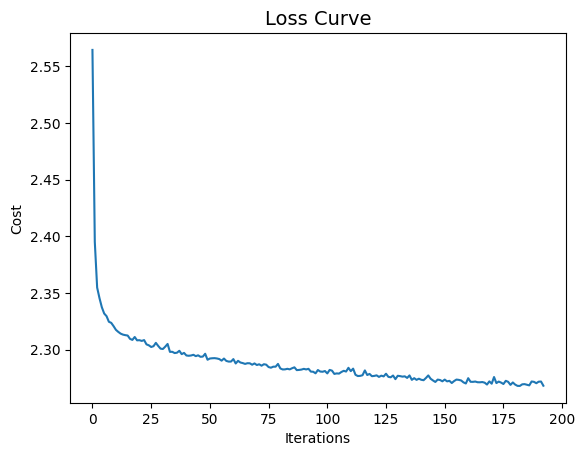

In [ ]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


La curva muestra un error inicial mayor a 2.55, el cual disminuye pronunciadamente en las primeras 25 iteraciones. Alrededor de la iteración 100, el modelo comienza a ganar estabilidad (aunque presenta oscilaciones) y muestra una convergencia que tiende a 0, es decir, el modelo no ha sobreajustado los datos de entrenamiento.

In [ ]:
from sklearn.metrics import mean_squared_error   #Cuadrado del error medio
mse = mean_squared_error(testY1, y_pred2)
print("MSE:", mse)

MSE: 4.985982902781006


La función MSE mide qué tan alejadas, en promedio, están las predicciones del modelo de los valores reales. Vemos que el cuadrado del error medio es igual a 4.985982902781006, lo que implica un error promedio de aproximadamente 2.23 visitas. Considerando que el rango de valores de la variable de salida *P6161s1* es de 0 a 12, este error representa aproximadamente el $(2.23/{12} )*100 ≈ 18.6%$ % del rango total.

Teniendo en cuenta esto y lo hallado en la curva de predicción, se observa que el modelo tiene una capacidad de predicción moderada, aunque todavía con margen para mejorar su precisión.

In [ ]:
no_obs = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]])
mlp_reg.predict(no_obs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([-0.15652679])

Vemos que para un menor que permanece la mayor parte del tiempo entre semana solo en su casa, que no asiste al jardín dado que este no tiene cupos, que no desayuna ni almuerza, que no realiza actividades con su madre pero sí con su padre,  el modelo predice un valor negativo (-0.1565) para el número de controles médicos recibidos. Dado que este no puede ser negativo, esta predicción se interpreta como 0 controles médicos recibidos durante el año.


El modelo arroja valores decimales debido a que es un regresor, no clasificador, por otro lado, el modelo no tiene activación en la capa de salida puede predecir cualquier número real, incluso negativos. Puede también deberse a que el escenario creado represente una probabilidad muy baja de recibir atención médica por parte del menor, luego, el modelo lo estima con un valor negativo.

In [ ]:
no_obs = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]])
mlp_reg.predict(no_obs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([2.57043735])

Se observa que un menor que permanece la mayor parte del tiempo entre semana en su casa con una niñera, que no asiste al jardín dado que no tiene la edad suficiente para hacerlo, que sí desayuna mas no almuerza ni toma onces y que comparte con ambos padres sería típicamente llevado entre 2 y 3 veces a consulta anualmente.
Dado que se desea el número exacto de citas que un menor con estas características tuvo, este serían dos citas anuales (ya que no se pueden tener 2.57 citas).

In [ ]:
no_obs = np.array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1]])
mlp_reg.predict(no_obs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([1.68872988])

Se observa que un menor que permanece la mayor parte del tiempo entre semana en su casa con su padre o madre, que no asiste al jardín dado que no hay ninguno cerca de su hogar, que sí desayuna mas no almuerza ni toma onces y que comparte con ambos padres recibe típicamente entre 1 y 2 veces asistencia médica al año.

Como tal, se predice que un menor con estas características recibe asistencia médica 1 vez al año.

## 3.2.  Comparación con otras metodologías estadísticas

Como alternativa al uso de redes neuronales, se puede aplicar un modelo de regresión lineal múltiple, el cual permite identificar el peso específico de cada variable (como el tipo de cuidado o la alimentación) sobre el número de controles de desarrollo y crecimiento recibidos por los menores. Aunque este modelo es más simple y fácil de interpretar, puede no capturar relaciones complejas presentes en los datos.

> Según Gujarati (2003), la regresión lineal es adecuada cuando se busca una explicación clara de la influencia de cada factor, más que una alta precisión predictiva.


Otra metodología útil para predecir la cantidad de citas médicas que reciben los menores es el uso de un árbol de decisión para regresión, el cual permite explorar relaciones complejas entre variables sociales como el tipo de cuidado, alimentación y actividades parentales.


> Según Breiman et al. (1984), los árboles de regresión son especialmente adecuados cuando existen patrones no lineales o efectos combinados entre variables, lo cual es frecuente en estudios sociales y de salud infantil





## 4. Conclusiones
Puede concluirse, desde el análisis estadístico, que los factores altamente ligados a la inaccesibilidad médica en niños menores a 5 años en Colombia son la alimentación, el aislamiento social, reflejado en la permanencia del menor en la casa, sin asistir a un jardín o guardería y sin compañía de algún acudiente y la escasa interacción con los padres, ya que los menores cuyos padres sí realizan actividades con ellos, sí tienen acceso a controles médicos.

Por otro lado, se concluye que los patrones bajo los cuales un menor no recibe controles de crecimiento no son tan homogéneos y fácilmente predecibles que los patrones bajo los cuales un menor sí recibe controles, ya que los modelos implementados lograron predecir muy bien bajo qué condiciones un menor sí recibe atención médica, mientras que tuvieron inconvenientes determinando bajo que circunstancias no lo hacía.

Adicionalmente, se establece que de igual forma, la asistencia a controles médicos por parte de los menores que sí tienen acceso a ellos no es muy alta, ya que bajo las circunstancias familiares, sociales y de alimentación  establecidas bajo las cuales un menor sí es llevado a consulta, se observó que el número de veces que estos fueron observados en controles durante el año previo a la encuesta osicla entre 1 y 3 veces.

Finalmente, se concluye que según lo encontrado en el análisis, no sólo es necesario implementar o reforzar políticas de protección de los niños enfocadas en su alimentación o escasos recursos económicos, sino también deben estar direccionadas a proteger su contexto social y familiar, debido a que el aislamiento social de los niños influye directamente en su acceso a controles para su salud.

## Referencias

* Breiman, L., Friedman, J. H., Olshen, R. A., & Stone, C. J. (1984). Classification and Regression Trees. Wadsworth International Group.
*   Departamento Administrativo Nacional de Estadistica. (25 de septiembre de 2017). *Encuesta longitudinal de Protección Social - ELPS 2012*. https://microdatos.dane.gov.co/index.php/catalog/194/study-description9
* Gujarati, D. N. (2003). Econometría. McGraw-Hill.
*   Scikit-learn developers. (n.d.). 1.17. Neural network models (supervised). Scikit-learn. Recuperado el 25 de mayo de 2025, de https://scikit-learn.org/stable/modules/neural_networks_supervised.html

*  Sociedad Colombiana de Pediatría. (2011). *DERECHOS DE LA NIÑEZ Y
LOS SERVICIOS DE SALUD*. [Archivo PDF]. https://scp.com.co/wp-content/uploads/2014/08/Derechos-de-la-ninez-y-los-servicios-de-saludadaptacion-para-Colombia-2011.pdf

